In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


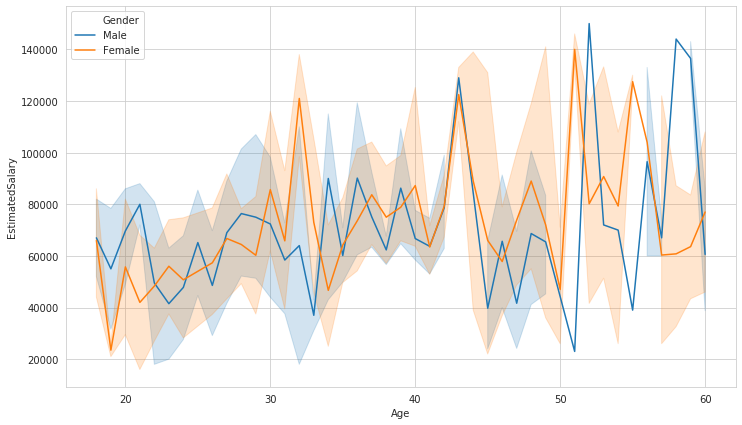

In [6]:
sns.set_style('whitegrid')

plt.figure(figsize = (12,7))

sns.lineplot(x = 'Age' , y = 'EstimatedSalary' , data = dataset , hue = 'Gender')

In [7]:
# we are going to use only the age and salary col to predict the classification

X = dataset[['Age' , 'EstimatedSalary']]
y = dataset['Purchased']

In [8]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
# as there is a large scale variation in the Age and Salary column we have to perform Scaling

from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
X = sc.fit_transform(X)

In [12]:
# now as we have enough data we can create training and test data

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 0)

In [13]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

In [14]:
classifier.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
ypred = classifier.predict(X_test)

In [16]:
# analyze the result using a confusion matrix

from sklearn.metrics import confusion_matrix
# note that confusion_matrix is not a class but a function

# Class always starts with a Uppercase letter
# whereas function start in lowercase letter

cm = confusion_matrix(y_test , ypred)

print(cm)

[[65  3]
 [ 8 24]]


The output is based on the true positive and true negative table

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


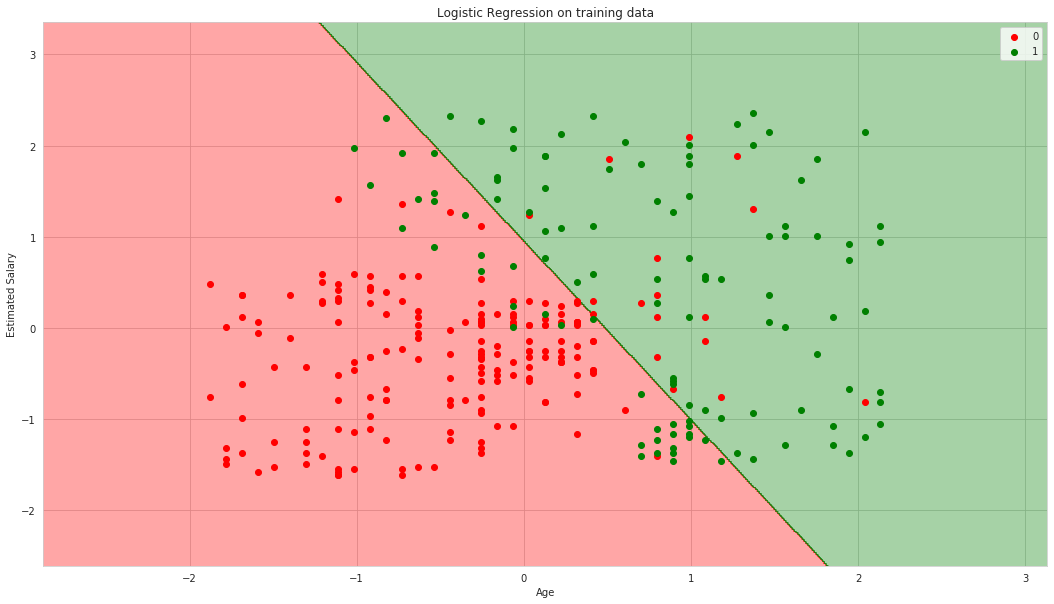

In [17]:
# Visualizing Logistic Regression On Training Data

sns.set_style('whitegrid')
plt.figure(figsize = (18,10))
from matplotlib.colors import ListedColormap

X_set , y_set = X_train , y_train

#-------------------

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1 , stop = X_set[:,0].max() + 1 , step = 0.01) ,
                      np.arange(start = X_set[:,1].min() - 1 , stop = X_set[:,1].max() + 1 , step = 0.01))

# meshgrid converts a 1D array into a matrix conining the rectangular coordinates for that points in the array
# and here we are taking arange two times because we have two parameters deciding the value

#-------------------
plt.contourf(X1 ,X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha = 0.35,
            cmap = ListedColormap(('red' , 'green')))

# contour fill plot is used to plot contours and fill the regions having same value with some color
# ravel converts a n dim matrix into an 1D array

#------------------
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#--------------------

for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0] , X_set[y_set == j , 1] , c = ListedColormap(('red','green'))(i) , label = j)

# enumerate returns the a set of labels and for each unique value in the array returned by unique()
# here in this case j will be 0 ,1 i.e the unique values and i will be 0,1 i.e the label assigned to this values

plt.title('Logistic Regression on training data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

The coloured region are the regions predicted by the classifier

where as the scatterplot is the actual data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


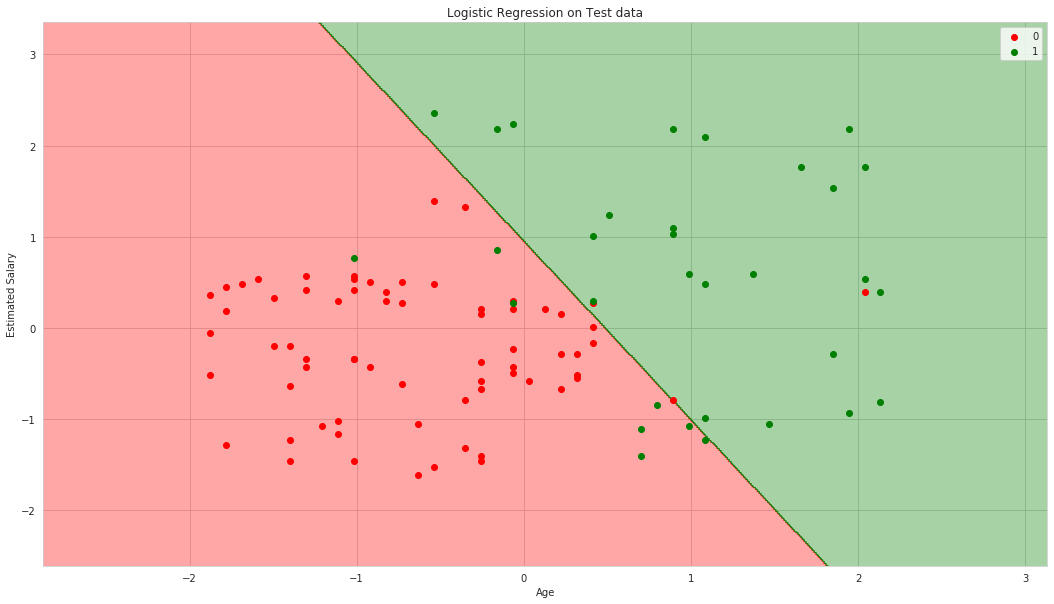

In [18]:
# Visualizing Logistic Regression On Test Data

sns.set_style('whitegrid')
plt.figure(figsize = (18,10))
from matplotlib.colors import ListedColormap

X_set , y_set = X_test , y_test

#-------------------

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1 , stop = X_set[:,0].max() + 1 , step = 0.01) ,
                      np.arange(start = X_set[:,1].min() - 1 , stop = X_set[:,1].max() + 1 , step = 0.01))

# meshgrid converts a 1D array into a matrix conining the rectangular coordinates for that points in the array
# and here we are taking arange two times because we have two parameters deciding the value

#-------------------
plt.contourf(X1 ,X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha = 0.35,
            cmap = ListedColormap(('red' , 'green')))

# the classifier here predixts the values and plots them which appers to us as the coloured regions
# contour fill plot is used to plot contours and fill the regions having same value with some color
# ravel converts a n dim matrix into an 1D array

#------------------
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#--------------------

for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0] , X_set[y_set == j , 1] , c = ListedColormap(('red','green'))(i) , label = j)

# enumerate returns the a set of labels and for each unique value in the array returned by unique()
# here in this case j will be 0 ,1 i.e the unique values and i will be 0,1 i.e the label assigned to this values

plt.title('Logistic Regression on Test data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

Done`

In [20]:
import statsmodels.api as sm

In [31]:
regg = sm.Logit(endog=y_train , exog=X_train).fit()

Optimization terminated successfully.
         Current function value: 0.442700
         Iterations 7


In [32]:
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:                  0.3282
Time:                        16:44:57   Log-Likelihood:                -132.81
converged:                       True   LL-Null:                       -197.69
Covariance Type:            nonrobust   LLR p-value:                 4.640e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8882      0.240      7.860      0.000       1.417       2.359
x2             1.0359      0.191      5.412      0.000       0.661       1.411
==============================================================================
"""

In [33]:
reg = sm.OLS(endog=y_train , exog=X_train).fit().summary()

In [34]:
reg

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Purchased   R-squared (uncentered):                   0.296
Model:                            OLS   Adj. R-squared (uncentered):              0.291
Method:                 Least Squares   F-statistic:                              62.65
Date:                Thu, 26 Mar 2020   Prob (F-statistic):                    1.94e-23
Time:                        17:19:40   Log-Likelihood:                         -223.90
No. Observations:                 300   AIC:                                      451.8
Df Residuals:                     298   BIC:                                      459.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2970      0.031      9.603      0.000       0.236       0.358
x2             0.1278      0.029      4.335      0.000       0.070       0.186
==============================================================================
Omnibus:                       15.429   Durbin-Watson:                   1.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.543
Skew:                           0.009   Prob(JB):                       0.0380
Kurtosis:                       2.277   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
classifier.coef_

array([[2.14341888, 1.09386665]])